# Billboard EDA III

## This is where I tried to run the Gini Analysis. It's functional towards the end of here, but the process is better in Notebook IV. 

In [1]:
# Billboard EDA III

# Packages and Settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from datetime import datetime
from IPython.display import display
import statsmodels.api as sm



%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')
billboard_df.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1990-0...,2/10/1990,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1
1,http://www.billboard.com/charts/hot-100/1990-0...,2/17/1990,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2
2,http://www.billboard.com/charts/hot-100/1990-0...,2/24/1990,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3
3,http://www.billboard.com/charts/hot-100/1990-0...,3/3/1990,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4
4,http://www.billboard.com/charts/hot-100/1990-0...,3/10/1990,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5


In [3]:
# converting WeekID to datetime
billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [4]:
# renaming columns to python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [5]:
#creating date/month/day/year columns
#note: I don't remember why I made year a float 

billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year
#billboard_df['year'] = billboard_df['week_id'].dt.year.astype(float)

In [6]:
billboard_df.dtypes

url                           object
week_id               datetime64[ns]
week_position                  int64
song                          object
performer                     object
song_id                       object
instance                       int64
prev_week_position           float64
peak_position                  int64
weeks_on_chart                 int64
date                          object
month                          int64
day                            int64
year                         float64
dtype: object

In [7]:
# dropping 'URL' column- I don't think I'll reference it for now
# Note: I might be using the URL column if I end up doing some webscraping
billboard_df = billboard_df.drop(columns=['url'])

In [8]:
# replacing artist names

billboard_df["performer"]= billboard_df["performer"].replace("Elvis Presley With The Jordanaires", "Elvis Presley") 
billboard_df["performer"]= billboard_df["performer"].replace("James Brown And The Famous Flames", "James Brown") 
billboard_df["performer"]= billboard_df["performer"].replace("Prince and the Revolution", "Prince") 

In [9]:
#Note: The Gini code needs week_points to be a float to run. 


billboard_df['week_points'] = billboard_df.apply(lambda row: 101- row.week_position, axis=1).astype(float)

In [88]:
billboard_df['weeks_on_chart'] = billboard_df['weeks_on_chart'].astype(float)

In [10]:
sample_groupby = billboard_df.groupby('song_id').sum()

In [11]:
sample_groupby.shape

(28193, 9)

In [12]:
sample_groupby.head(50)

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,week_points
song_id,,,,,,,,,
"""B"" GirlsYoung And Restless",1065,15,974.0,889,120,94,227,29850.0,450.0
"""Cherry Cherry"" from Hot August NightNeil Diamond",479,10,428.0,459,55,40,178,19730.0,531.0
"""Having A Party"" MedleyThe Ovations (Featuring Louis Williams)",684,9,622.0,678,45,98,123,17757.0,225.0
"""Joy"" Pt. IIsaac Hayes",380,9,338.0,368,45,34,140,17764.0,529.0
"""Roots"" MedleyQuincy Jones",494,7,411.0,468,28,24,89,13839.0,213.0
"""Yep!""Duane Eddy His Twangy Guitar And The Rebels",507,9,429.0,386,45,39,136,17631.0,402.0
#1 Dee JayGoody Goody,452,5,353.0,418,15,58,70,9890.0,53.0
#1Nelly,802,20,730.0,637,210,139,290,40029.0,1218.0
#9 DreamJohn Lennon,367,12,320.0,325,78,42,162,23698.0,845.0


In [13]:


sample_groupby = sample_groupby.sort_values(by=['week_points'], ascending=False)

In [14]:
points_total = sample_groupby['week_points'].sum()
print (points_total)

16048874.0


In [15]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

In [16]:
#gini(sample_groupby.week_points)

In [17]:
weekpoints_array = sample_groupby.week_points.to_numpy().astype(float)

In [18]:
print(weekpoints_array)

[5.932e+03 5.615e+03 5.499e+03 ... 1.000e+00 1.000e+00 1.000e+00]


In [19]:
gini(weekpoints_array)

0.5530190719893106

In [20]:
sample_groupby.dtypes

week_position           int64
instance                int64
prev_week_position    float64
peak_position           int64
weeks_on_chart          int64
month                   int64
day                     int64
year                  float64
week_points           float64
dtype: object

In [21]:
performer_groupby = billboard_df.groupby('performer').sum()

In [22]:
performer_groupby.head(200)

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,week_points
performer,,,,,,,,,
"""Groove"" Holmes",1000,14,846.0,982,72,112,198,27524.0,414.0
"""Little"" Jimmy Dickens",422,10,375.0,377,55,110,168,19650.0,588.0
"""Pookie"" Hudson",96,1,0.0,96,1,5,25,1963.0,5.0
"""Weird Al"" Yankovic",5492,91,4462.0,3897,601,544,1458,181406.0,3699.0
'N Sync,5006,172,4478.0,3356,2004,1042,2577,343972.0,12366.0
'N Sync & Gloria Estefan,1078,22,888.0,518,210,181,300,39983.0,942.0
'N Sync Featuring Nelly,461,20,418.0,291,210,81,298,40040.0,1559.0
'Til Tuesday,2905,53,2462.0,2475,412,344,886,105251.0,2448.0
(+44),89,1,0.0,89,1,12,2,2006.0,12.0


In [23]:
weekpoints_performer_array = performer_groupby.week_points.to_numpy().astype(float)

In [24]:
gini(weekpoints_performer_array)

0.720759320142285

In [25]:
yearly_groupby = billboard_df.groupby('year').sum()

In [26]:
weekpoints_yearly_array = yearly_groupby.week_points.to_numpy().astype(float)

In [27]:
gini(weekpoints_yearly_array)

0.020223808526291878

In [28]:
billboard_df.head(60)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990.0,26.0
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990.0,48.0
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990.0,58.0
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990.0,64.0
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990.0,74.0
5,1990-03-17,24,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,27.0,24,6,1990-03-17,3,17,1990.0,77.0
6,1990-03-24,12,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,24.0,12,7,1990-03-24,3,24,1990.0,89.0
7,1990-03-31,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,12.0,6,8,1990-03-31,3,31,1990.0,95.0
8,1990-04-07,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,6,9,1990-04-07,4,7,1990.0,95.0
9,1990-04-14,2,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,2,10,1990-04-14,4,14,1990.0,99.0


In [29]:
#billboard_df['year_gini']= billboard_df.groupby('year').apply(gini)

In [30]:
def gini_two(series):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = series.to_numpy().flatten() #all values are treated equally, arrays must be 1d

    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient 

In [31]:
#billboard_df.year.apply(gini_two)

In [32]:
gini_two(billboard_df.year)

0.005105429075882937

In [33]:
#gini_two(yearly_groupby.year)

In [34]:
taylor_df = billboard_df.groupby('performer').agg({'week_points':gini_two})

In [35]:
taylor_df = taylor_df.sort_values(by=['week_points'], ascending=False)

In [36]:
taylor_df.head(200)

,week_points
performer,
Sawyer Fredericks,0.567488
Steve Aoki & Louis Tomlinson,0.559649
Kid Cudi Featuring MGMT & Ratatat,0.557823
Young The Giant,0.552083
Beyonce Featuring Lady Gaga,0.543750
Young Jeezy Featuring Lil Wayne,0.543284
"Kanye West Featuring Jay-Z, Rick Ross, Bon Iver & Nicki Minaj",0.542105
Metro Boomin Featuring Offset & Drake,0.540000
Maejor Ali Featuring Juicy J & Justin Bieber,0.539916


In [37]:
french_df = billboard_df[billboard_df['performer'].isin(['French Montana Featuring Nicki Minaj'])]

In [38]:
french_df.shape

(7, 14)

In [39]:
french_df.head(10)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
6892,2013-04-20,97,Freaks,French Montana Featuring Nicki Minaj,FreaksFrench Montana Featuring Nicki Minaj,1,99.0,77,4,2013-04-20,4,20,2013.0,4.0
10797,2013-04-06,94,Freaks,French Montana Featuring Nicki Minaj,FreaksFrench Montana Featuring Nicki Minaj,1,77.0,77,2,2013-04-06,4,6,2013.0,7.0
21330,2013-03-30,77,Freaks,French Montana Featuring Nicki Minaj,FreaksFrench Montana Featuring Nicki Minaj,1,NaN,77,1,2013-03-30,3,30,2013.0,24.0
78983,2013-04-13,99,Freaks,French Montana Featuring Nicki Minaj,FreaksFrench Montana Featuring Nicki Minaj,1,94.0,77,3,2013-04-13,4,13,2013.0,2.0
270353,2013-05-04,99,Freaks,French Montana Featuring Nicki Minaj,FreaksFrench Montana Featuring Nicki Minaj,2,NaN,99,5,2013-05-04,5,4,2013.0,2.0
270669,2013-05-11,98,Freaks,French Montana Featuring Nicki Minaj,FreaksFrench Montana Featuring Nicki Minaj,2,99.0,98,6,2013-05-11,5,11,2013.0,3.0
270979,2013-05-18,100,Freaks,French Montana Featuring Nicki Minaj,FreaksFrench Montana Featuring Nicki Minaj,2,98.0,98,7,2013-05-18,5,18,2013.0,1.0


In [40]:
rick_df = billboard_df[billboard_df['performer'].isin(['Rick Ross Featuring Jay-Z'])]

In [41]:
rick_df.shape

(1, 14)

In [42]:
taylor_song_df = billboard_df.groupby('song_id').agg({'week_points':gini_two})

In [43]:
taylor_song_df = taylor_song_df.sort_values(by=['week_points'], ascending=True)

In [44]:
taylor_song_df.head(200)

,week_points
song_id,
When You're #1Gene Chandler,0.0
SomewhereP.J. Proby,0.0
I Don't Know What You've Got But It's Got Me - Part ILittle Richard,0.0
I Don't Know How To Love Him/Everything's AlrightThe Kimberlys,0.0
Whatever U WantChristina Milian Featuring Joe Budden,0.0
SongbirdGlee Cast,0.0
Blood.Kendrick Lamar,0.0
Blow A BagFuture,0.0
Blow Your Mind (Mwah)Dua Lipa,0.0


In [45]:
taylor_song_df.week_points.describe()

count    28193.000000
mean         0.192478
std          0.097039
min          0.000000
25%          0.136188
50%          0.197120
75%          0.253314
max          0.680952
Name: week_points, dtype: float64

In [46]:
IQR = 0.253314 - 0.136188

In [47]:
IQR * 1.5

0.17568899999999998

In [48]:
0.17568899999999998 + 0.253314

0.42900299999999997

In [49]:
# BeautifulEminem
beautiful_df = billboard_df[billboard_df['song_id'].isin(['BeautifulEminem'])].sort_values(by=['week_id'], ascending=True)


In [50]:
beautiful_df.head(10)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
1603,2009-05-30,17,Beautiful,Eminem,BeautifulEminem,1,NaN,17,1,2009-05-30,5,30,2009.0,84.0
292068,2009-06-27,97,Beautiful,Eminem,BeautifulEminem,2,NaN,97,2,2009-06-27,6,27,2009.0,4.0
292454,2009-07-04,95,Beautiful,Eminem,BeautifulEminem,2,97.0,95,3,2009-07-04,7,4,2009.0,6.0
292926,2009-07-11,100,Beautiful,Eminem,BeautifulEminem,2,95.0,95,4,2009-07-11,7,11,2009.0,1.0
230123,2009-08-01,98,Beautiful,Eminem,BeautifulEminem,3,NaN,98,5,2009-08-01,8,1,2009.0,3.0
230174,2009-08-08,94,Beautiful,Eminem,BeautifulEminem,3,98.0,94,6,2009-08-08,8,8,2009.0,7.0


Current goals: 
1) get series of all unique values in "year" column
2) construct for-loop from original Gini function (not Taylor's)
3) find way to get output (2 column table: year and GINI)

NOTE: at some point, plot artist by frequency they appeared in chart? trying to somehow capture "album effect"

In [51]:
year_list = billboard_df.year.unique()

In [52]:
year_list.shape

(62,)

In [53]:
print(year_list)

[1990. 2011. 2016. 2017. 1971. 1989. 1996. 1963. 2003. 1980. 1981. 1991.
 1978. 1972. 1969. 1984. 2005. 1962. 1977. 1964. 1970. 1966. 1988. 1961.
 2013. 1985. 1967. 2001. 2002. 1983. 1958. 1959. 1960. 1995. 1997. 2006.
 2009. 2012. 2014. 2018. 2019. 2008. 2010. 2015. 1998. 2004. 2007. 1993.
 1999. 1973. 1965. 1976. 1986. 2000. 1968. 1979. 1994. 1987. 1992. 1975.
 1982. 1974.]


In [54]:
year_list[0].dtype

dtype('float64')

In [55]:
billboard_df.year.describe()

count    317795.000000
mean       1988.528281
std          17.586684
min        1958.000000
25%        1973.000000
50%        1989.000000
75%        2004.000000
max        2019.000000
Name: year, dtype: float64

In [56]:
# Empty dataframe for appending Gini results (Marathon-style)
gini_attempt_df = pd.DataFrame(columns = ['year', 'gini'])

In [57]:
# For Loop attempt! :D

for i in year_list:
    result = gini(i)
    df = pd.DataFrame(result)
    gini_attempt_df = pd.concat([gini_attempt_df, df], axis=0)
    

ValueError: DataFrame constructor not properly called!

In [ ]:
# For Loop attempt: Song DF

for i in billboard_df.year.unique:
    df = billboard_df[billboard_df['performer'].isin(['Rick Ross Featuring Jay-Z'])]
    result = gini(i)
    #df = pd.DataFrame(result)
    #gini_attempt_df = pd.concat([gini_attempt_df, df], axis=0)

In [58]:
result.shape

()

In [59]:
#code for getting values from groupby: might be useful at some point
# df_1504 = my_groupby.get_group(1504)

# also code 
  #df = sales_df[sales_df.STORE == i]

In [60]:
taylor_year_df = billboard_df.groupby('year').agg({'week_points':gini_two})

In [61]:
taylor_year_df = taylor_year_df.sort_values(by=['week_points'], ascending=False)

In [62]:
taylor_year_df.head(200)

,week_points
year,
1976.0,0.330021
1978.0,0.330007
1960.0,0.330001
1977.0,0.330001
2019.0,0.330000
2000.0,0.330000
2016.0,0.330000
1992.0,0.330000
1993.0,0.330000


In [63]:
gini_three = billboard_df['week_points'].groupby([billboard_df['song_id']]).apply(gini_two).groupby(billboard_df['year']).mean()

In [64]:
gini_three.shape

(0,)

In [65]:
gini_three.head()

Series([], Name: week_points, dtype: float64)

In [66]:
eminem_check = gini_three[gini_three['song_id'].isin(['BeautifulEminem'])]

KeyError: 'song_id'

In [67]:
def cool_function():
    cool_dict = {}
    for i in performer_groupby.year.unique():
        df = performer_groupby[performer_groupby.year == i].apply(gini_two)
        
    return df

In [68]:
def very_cool_function():
    for i in performer_groupby.year.unique():
        array = yearly_groupby.week_points.to_numpy().astype(float)
        df = performer_groupby[performer_groupby.year == i].apply(gini_two)
        
    return df

In [69]:
my_dataframe_dict

NameError: name 'my_dataframe_dict' is not defined

In [70]:
new_weekpoints_array = sample_groupby.week_points.to_numpy().astype(float)

## This is the work I did with Taylor- aka the Gini analysis that actually works. Please keep this!

In [71]:
new_sample_groupby = billboard_df.groupby(['song_id', 'year']).sum()

In [72]:
new_sample_groupby.head(200)

week_position  instance  prev_week_position  peak_position  weeks_on_chart  month  day  week_points
song_id                                            year                                                                                                       
"B" GirlsYoung And Restless                        1990.0           1065        15               974.0            889             120     94  227        450.0
"Cherry Cherry" from Hot August NightNeil Diamond  1973.0            479        10               428.0            459              55     40  178        531.0
"Having A Party" MedleyThe Ovations (Featuring ... 1973.0            684         9               622.0            678              45     98  123        225.0
"Joy" Pt. IIsaac Hayes                             1973.0            134         2                72.0            134               3     24   51         68.0
                                                   1974.0            246         7               266.0            234              42     10   89        461.0
"Roots" MedleyQuincy Jones                         1977.0            494         7               411.0            468              28     24   89        213.0
"Yep!"Duane Eddy His Twangy Guitar And The Rebels  1959.0            507         9               429.0            386              45     39  136        402.0
#1 Dee JayGoody Goody                              1978.0            452         5               353.0            418              15     58   70         53.0
#1Nelly                                            2001.0            442        11               417.0            439              66    124  176        669.0
                                                   2002.0            360         9               313.0            198             144     15  114        549.0
#9 DreamJohn Lennon                                1974.0            126         2                68.0            126               3     24   49         76.0
                                                   1975.0            241        10               252.0            199              75     18  113        769.0
#BeautifulMariah Carey Featuring Miguel            2013.0            589        16               494.0            261             136    112  258       1027.0
#SELFIEThe Chainsmokers                            2014.0            468        11               373.0            229              66     45  182        643.0
#thatPOWERwill.i.am Featuring Justin Bieber        2013.0            689        16               604.0            397             136     87  238        927.0
$ave Dat MoneyLil Dicky Featuring Fetty Wap & R... 2015.0            632        14               381.0            626              28     76  137         75.0
                                                   2016.0            989        36               987.0            884             162     22  182        223.0
'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles  2002.0            180        10               176.0            180              55    113  176        830.0
                                                   2003.0            199        13               157.0             52             221     27  179       1114.0
'65 Love AffairPaul Davis                          1982.0            720        20               620.0            380             210     93  297       1300.0
'98 Thug ParadiseTragedy, Capone, Infinite         1998.0            455         5               356.0            437              15     48   75         50.0
'Round We GoBig Sister                             1996.0            191         2                91.0            182               3      8   19         11.0
'Til My Baby Comes HomeLuther Vandross             1985.0            895        16               796.0            712             136     75  268        721.0
'Til Summer Comes AroundKeith Urban                2010.0           1197        16  

In [73]:
new_sample_groupby = new_sample_groupby.sort_values(by=['song_id'], ascending=False)

In [74]:
other_df = billboard_df.groupby(['song_id', 'year']).week_points.sum().reset_index()

In [75]:
other_df.head(200)

,song_id,year,week_points
0,"""B"" GirlsYoung And Restless",1990.0,450.0
1,"""Cherry Cherry"" from Hot August NightNeil Diamond",1973.0,531.0
2,"""Having A Party"" MedleyThe Ovations (Featuring...",1973.0,225.0
3,"""Joy"" Pt. IIsaac Hayes",1973.0,68.0
4,"""Joy"" Pt. IIsaac Hayes",1974.0,461.0
5,"""Roots"" MedleyQuincy Jones",1977.0,213.0
6,"""Yep!""Duane Eddy His Twangy Guitar And The Rebels",1959.0,402.0
7,#1 Dee JayGoody Goody,1978.0,53.0
8,#1Nelly,2001.0,669.0
9,#1Nelly,2002.0,549.0


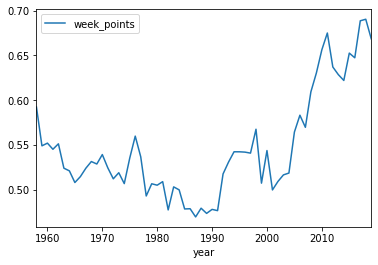

In [76]:
other_df.groupby('year').agg({'week_points':gini_two}).plot()

In [77]:
#note: do boxplots of weird years


In [78]:
performer_other_df = billboard_df.groupby(['performer', 'year']).week_points.sum().reset_index()

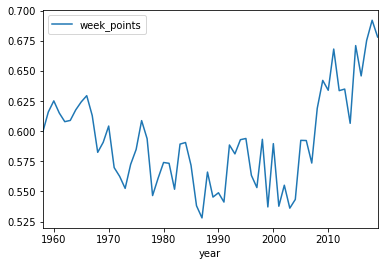

In [79]:
performer_other_df.groupby('year').agg({'week_points':gini_two}).plot()

## This is the end of the stuff I worked on with Taylor. I need to do some cleaning before and after. 

## To-Do list: 

1) Make to-do list. 

In [89]:
the_alternate_df = billboard_df.groupby(['song_id', 'year']).weeks_on_chart.sum().reset_index()

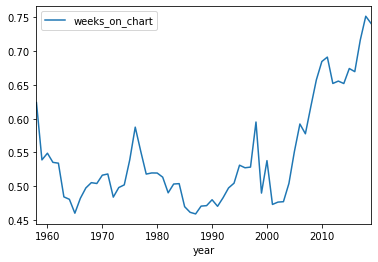

In [90]:
the_alternate_df.groupby('year').agg({'weeks_on_chart':gini_two}).plot()

In [91]:
the_alternate_performer_df = billboard_df.groupby(['performer', 'year']).weeks_on_chart.sum().reset_index()

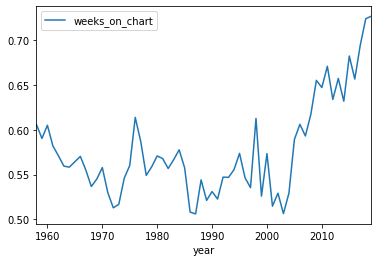

In [92]:
the_alternate_performer_df.groupby('year').agg({'weeks_on_chart':gini_two}).plot()